In [1]:
import laspy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
from colorspacious import cspace_converter
import matplotlib as mpl
import scipy 
import seaborn as sns

from pathlib import Path

base_path = Path('.')
list(base_path.glob('T*'))

file_name = "220829GO15D"
#change file name according to flight being analysed
datasetname = "datasets_05"

base_dir = "C:/Hobbies/programming/data/"
#file_path = base_dir + file_name + '/' + file_name + "_C_A.las"
#use file_path below for multiple flights on one date and adjust carefully
file_path = "C:/Hobbies/programming/data/220829GO15D/22GOempty/" + file_name + "_EMPTY_C_A.las"

C:\Hobbies\programming\T32\file_220905_T32_datasets_05.csv
521.728
521.7859191176472


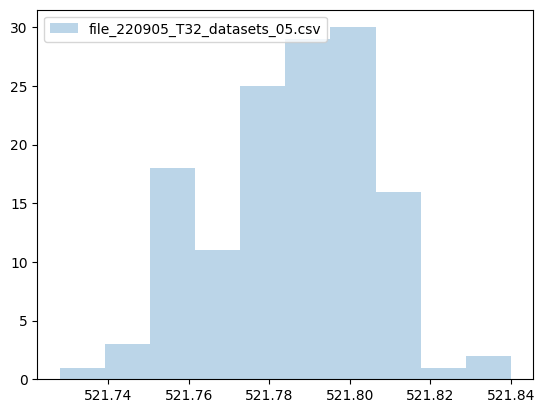

C:\Hobbies\programming\T32\file_220912_50_T32_datasets_05.csv
521.728
521.7804347826087


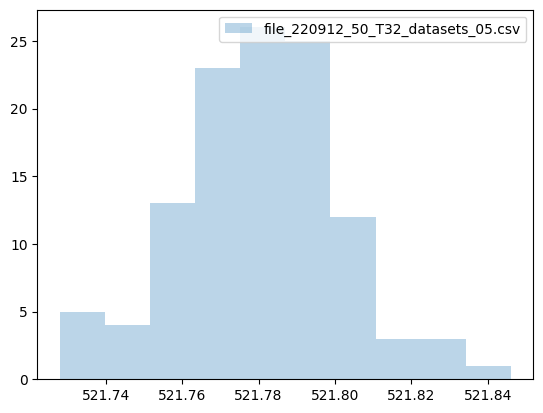

C:\Hobbies\programming\T32\file_220912_T32_datasets_05.csv
521.731
521.7764222222223


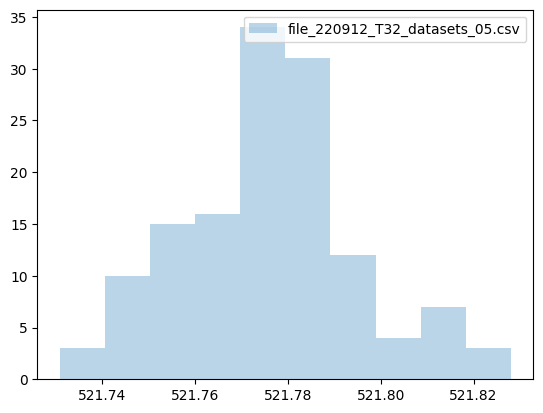

C:\Hobbies\programming\T32\file_220927_3MS_T32_datasets_05.csv
521.603
521.7172205882353


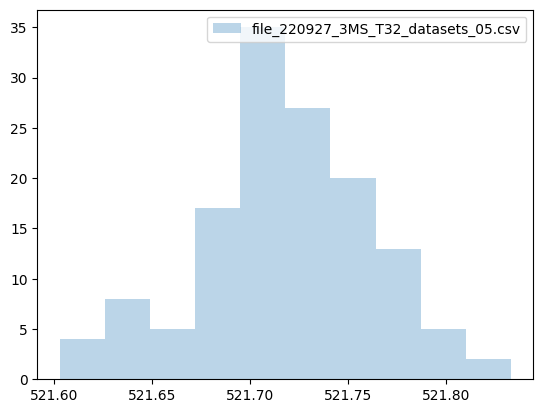

C:\Hobbies\programming\T32\file_220927_4MS_T32_datasets_05.csv
521.55
521.6721333333334


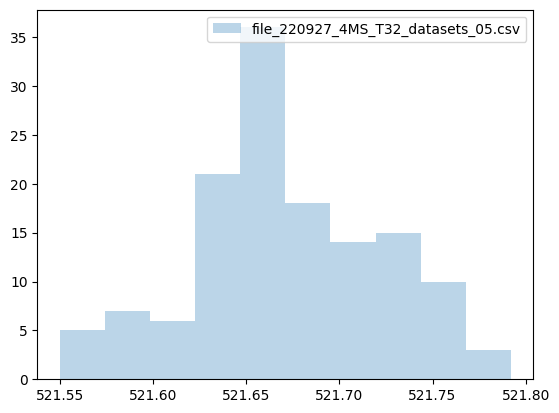

C:\Hobbies\programming\T32\file_221011_T32_datasets_05.csv
521.527
521.6642919708029


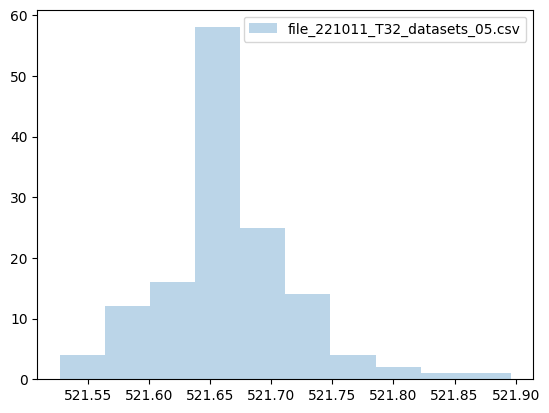

C:\Hobbies\programming\T32\file_221020_60_T32_datasets_05.csv
521.582
521.7344883720931


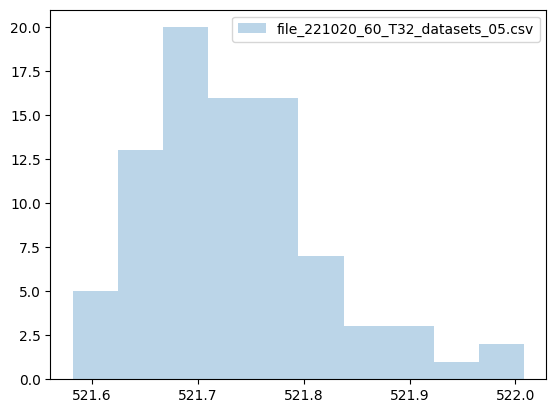

C:\Hobbies\programming\T32\file_221020_T32_datasets_05.csv
521.555
521.6874452554744


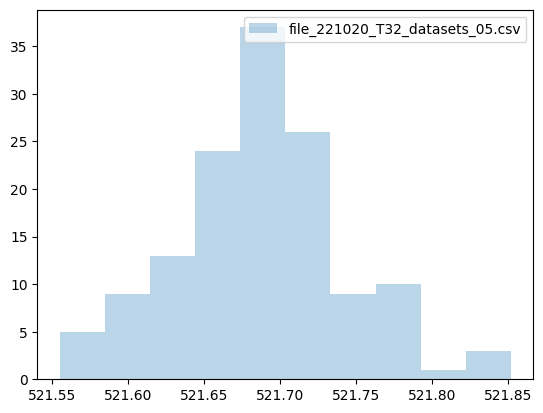

C:\Hobbies\programming\T32\file_221101_T32_datasets_05.csv
521.516
521.6741897810219


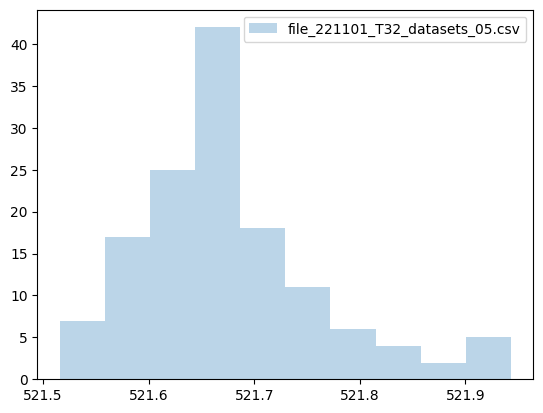

C:\Hobbies\programming\T32\file_221117_T32_datasets_05.csv
521.439
521.6385895522387


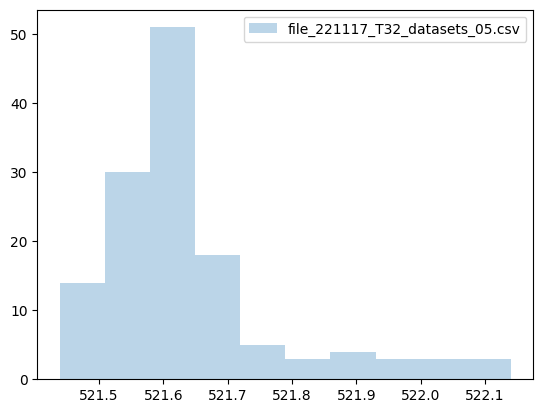

C:\Hobbies\programming\T32\file_221128_T32_datasets_05.csv
521.494
521.6516642335765


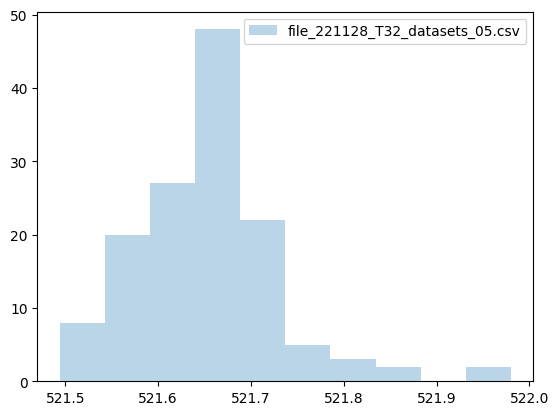

C:\Hobbies\programming\T32\file_230119_T32_datasets_05.csv
521.533
521.7074485294116


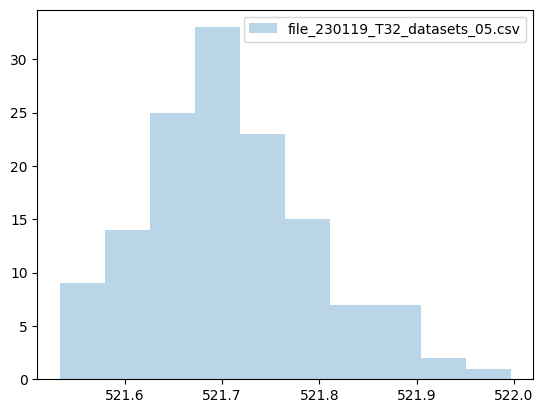

In [2]:
#Histogram comparing the frequency of Z values of one specified grave for all processed flights. Adjust the number
# in Flight_file path name to select resolution

#dataset = eval(datasetname)
Grave = 'T32'
Tomb = Path('C:/Hobbies/programming/' + Grave)
Flight_files = Tomb.glob('file_*_'+datasetname+'.csv')
for Flight_file in Flight_files: 
    if 'file_220829' in Flight_file.name: 
        continue
    dataset = pd.read_csv(Flight_file)
    plt.hist(dataset['z'], label = Flight_file.name, alpha = 0.3)
    #comment out below if you want overlapping histograms
    print(Flight_file)
    print(dataset['z'].min())
    print(dataset['z'].mean())
    plt.legend()
    plt.show()
    
    
#plt.legend()

(array([24., 30., 29., 38., 18.,  4.,  6.,  5.,  5.,  1.]),
 array([521.398 , 521.4498, 521.5016, 521.5534, 521.6052, 521.657 ,
        521.7088, 521.7606, 521.8124, 521.8642, 521.916 ]),
 <BarContainer object of 10 artists>)

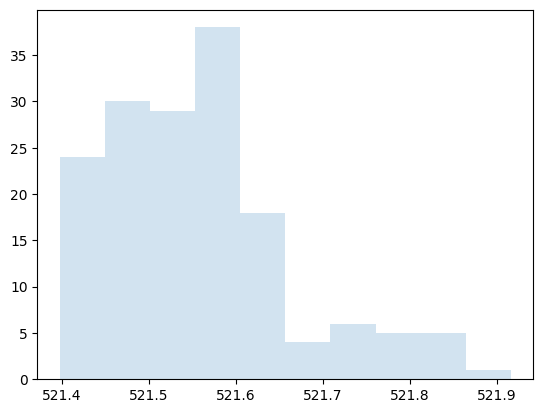

In [3]:
#Histogram of frequency of Z values of one specific grave during one specific flight
Grave = 'T31'
Flight = '221128'
Datasetname = "datasets_1"
Tomb = Path("C:/Hobbies/programming/" + Grave)
Flight_file = Tomb / ("file_" + Flight + '_' + Grave + '_' + Datasetname + ".csv")
dataset = pd.read_csv(Flight_file)
plt.hist(dataset['z'], label = Flight_file.name, alpha = 0.2)

In [4]:
def file_difference(data1, data2):
    zdif = data1.set_index(['x', 'y']).z - data2.set_index(['x', 'y']).z    
    return zdif

def difference_file_name(tag1, tag2):
    return "height_differences_" + tag1 + "_" + tag2 + "_" + datasetname + ".csv"

def save_height_difference(tag1, tag2):
    file_difference(dataset[tag1], dataset[tag2]).to_csv(difference_file_name(tag1, tag2))

In [5]:
def difference_file_name(tag1, tag2):
    return "height_differences_" + tag1 + "_" + tag2 + ".csv"

In [6]:
file1 = "file_220829_r"
file2 = "file_220829_e"

zdiff = pd.read_csv(difference_file_name(file1, file2))

grid = zdiff.reset_index().pivot_table(columns='grid_x', index='grid_y', values='z')

FileNotFoundError: [Errno 2] No such file or directory: 'height_differences_file_220829_r_file_220829_e.csv'

In [7]:
#Differences in z value between a reference and all other flights for one specified grave
Graves = [f'T{num:02}' for num in range(1, 33)]

#Grave = 'T01'

for Grave in Graves:
    Tomb = Path('C:/Hobbies/programming/' + Grave)
    ref = '220829_r'
    reference_file = Tomb / ('file_220829_r_' + Grave + '_' + datasetname + '.csv')
    reference = pd.read_csv(reference_file)
    z_dif = {}
    Flight_files = Tomb.glob('file_*')

    for Flight_file in Flight_files:    
        if ref in Flight_file.name: 
            continue
        file = pd.read_csv(Flight_file)    
        dif = file_difference(reference, file)
        dif.to_csv('C:/Hobbies/programming/'+Grave+'/zdif_' + ref + '_' + Flight_file.name.split('_')[1] + '_' + Grave + '_' + datasetname  +'.csv')


In [8]:
#Create a dataframe including the following information per grave: tomb name, mean z dif, max z dif, min z dif, 
#time since burial, category of tomb, depth of tomb.

Graves = [f'T{num:02}' for num in range(1, 33)]
x = pd.read_csv('C:/Hobbies/programming/data/timeline.csv')
timeline = x.set_index("flight_date")['days_since_burial'] 
stats_per_grave = []

grave_data = pd.read_csv('data/grave_data.csv')
grave_data = pd.DataFrame(grave_data)

for grave in Graves:
    Tomb = Path('C:/Hobbies/programming/' + grave)
    zdif_files = Tomb.glob('zdif_*_'+datasetname+'.csv') 
    stats = pd.DataFrame()
    mean = {}
    median= {}
    maxx = {}
    minn = {}
    time = {}
    tomb = {}
    category = {}
    depth = {}
    for zdif_file in zdif_files:
        if '_220829_r_220829' in zdif_file.name:
            continue
        file = pd.read_csv(zdif_file)
        mean[zdif_file.name] = file['z'].median()
        median[zdif_file.name] =file['z'].mean()
        maxx[zdif_file.name] =file['z'].max()
        minn[zdif_file.name] =file['z'].min()
        time[zdif_file.name] = timeline[int(zdif_file.name.split('_')[3])]
        tomb[zdif_file.name] = grave
        category[zdif_file.name] = grave_data[grave_data['Grave'] == zdif_file.name.split('_')[4]]['Notes'].values[0] 
        depth[zdif_file.name] = grave_data[grave_data['Grave'] == zdif_file.name.split('_')[4]]['Depth_cm'].values[0] 
    stats['grave'] = tomb
    stats['mean'] = mean
    stats['median'] =median
    stats['maxx'] = maxx
    stats['minn'] = minn
    stats['time'] = time
    stats['category'] = category
    stats['depth'] = depth
    stats_per_grave.append(stats)
    #print(depth)


stats_per_grave_df = pd.concat(stats_per_grave)   
print(stats_per_grave_df[stats_per_grave_df['grave']=="T31"])


                                         grave    mean    median   maxx   
zdif_220829_r_220905_T31_datasets_05.csv   T31  0.0280  0.027228  0.061  \
zdif_220829_r_220912_T31_datasets_05.csv   T31  0.2310  0.220399  0.366   
zdif_220829_r_220927_T31_datasets_05.csv   T31  0.3095  0.291215  0.456   
zdif_220829_r_221011_T31_datasets_05.csv   T31  0.3140  0.302399  0.465   
zdif_220829_r_221020_T31_datasets_05.csv   T31  0.2855  0.278354  0.436   
zdif_220829_r_221101_T31_datasets_05.csv   T31  0.3270  0.312285  0.476   
zdif_220829_r_221117_T31_datasets_05.csv   T31  0.3740  0.362741  0.540   
zdif_220829_r_221128_T31_datasets_05.csv   T31  0.3295  0.319797  0.488   
zdif_220829_r_230119_T31_datasets_05.csv   T31  0.2880  0.248677  0.345   

                                           minn  time category  depth  
zdif_220829_r_220905_T31_datasets_05.csv -0.019     7    grave  200.0  
zdif_220829_r_220912_T31_datasets_05.csv  0.025    14    grave  200.0  
zdif_220829_r_220927_T31_datasets

In [9]:
stats_per_grave_df.to_csv('C:/Hobbies/programming/data/stats_per_grave.csv')

Text(0, 0.5, 'z difference (m)')

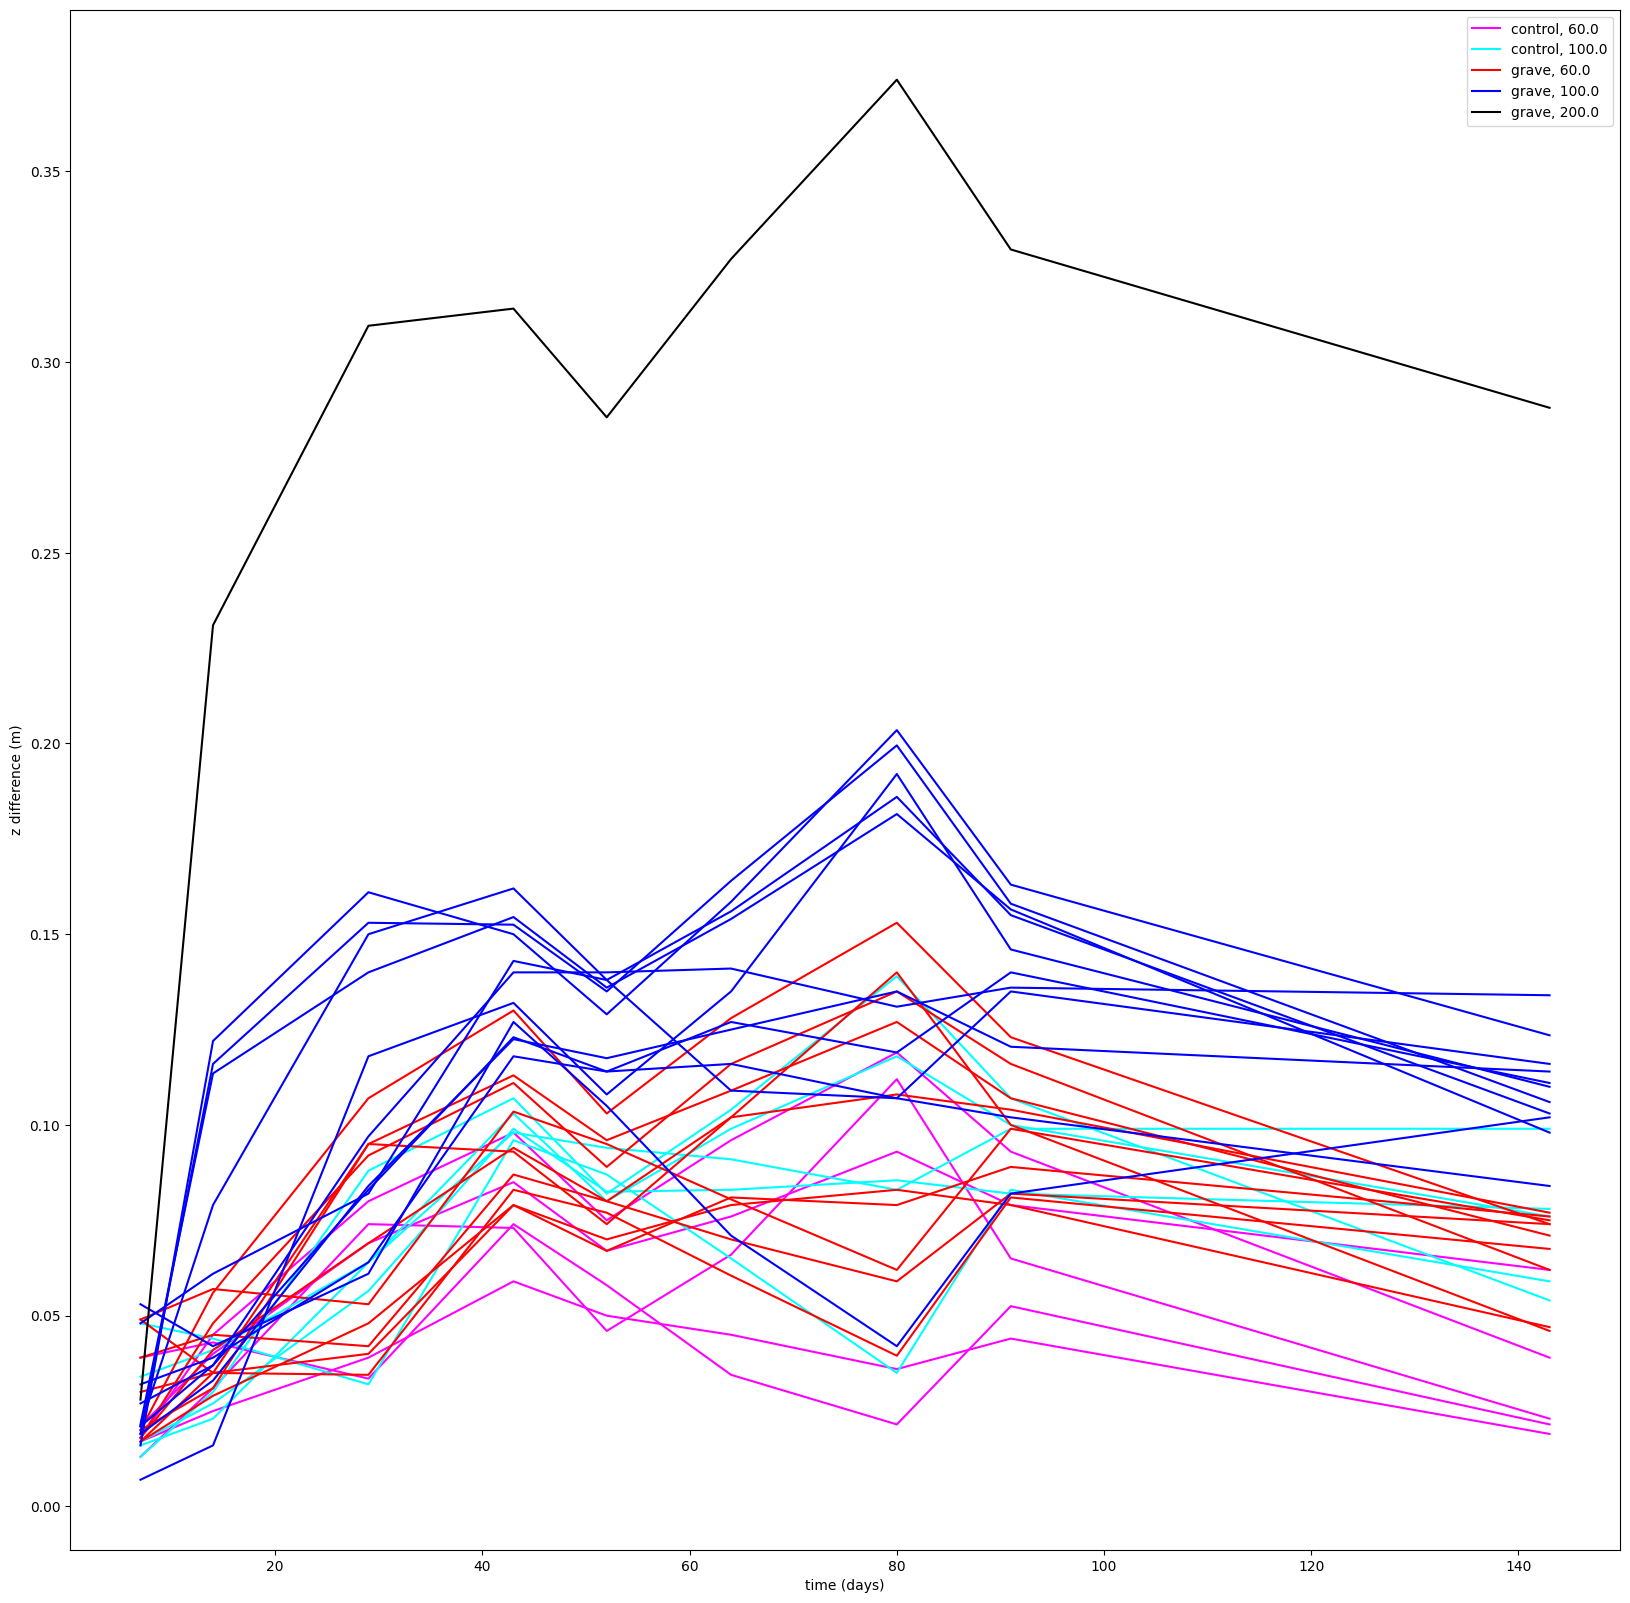

In [22]:
#Visualise all graves together over time

plt.figure(figsize = [20, 20])  
for (category, depth), stats in stats_per_grave_df.groupby(['category', 'depth']):
    #stats=stats_per_grave_df[stats_per_grave_df['category'] == category & stats_per_grave_df['depth'] == depth]
    if category == 'grave' and depth == 100:
        colour = 'b'
    elif category == 'control' and depth == 100:
        colour = 'cyan'
    elif category == 'grave' and depth == 60:
        colour = 'r'
    elif category == 'control' and depth == 60:
        colour = 'magenta'
    else:
        colour = 'k'
    label=f"{category}, {depth}"
    is_first = True
    for grave, grave_stats in stats.groupby('grave'):    
        plt.plot(grave_stats['time'], grave_stats['mean'], color= colour, label = label if is_first else None)
        is_first = False
plt.legend()
plt.xlabel('time (days)')
plt.ylabel('z difference (m)')

#plt.savefig('figures/mean_z_difference_over_time.png')




Text(0.5, 1.0, '100cm deep')

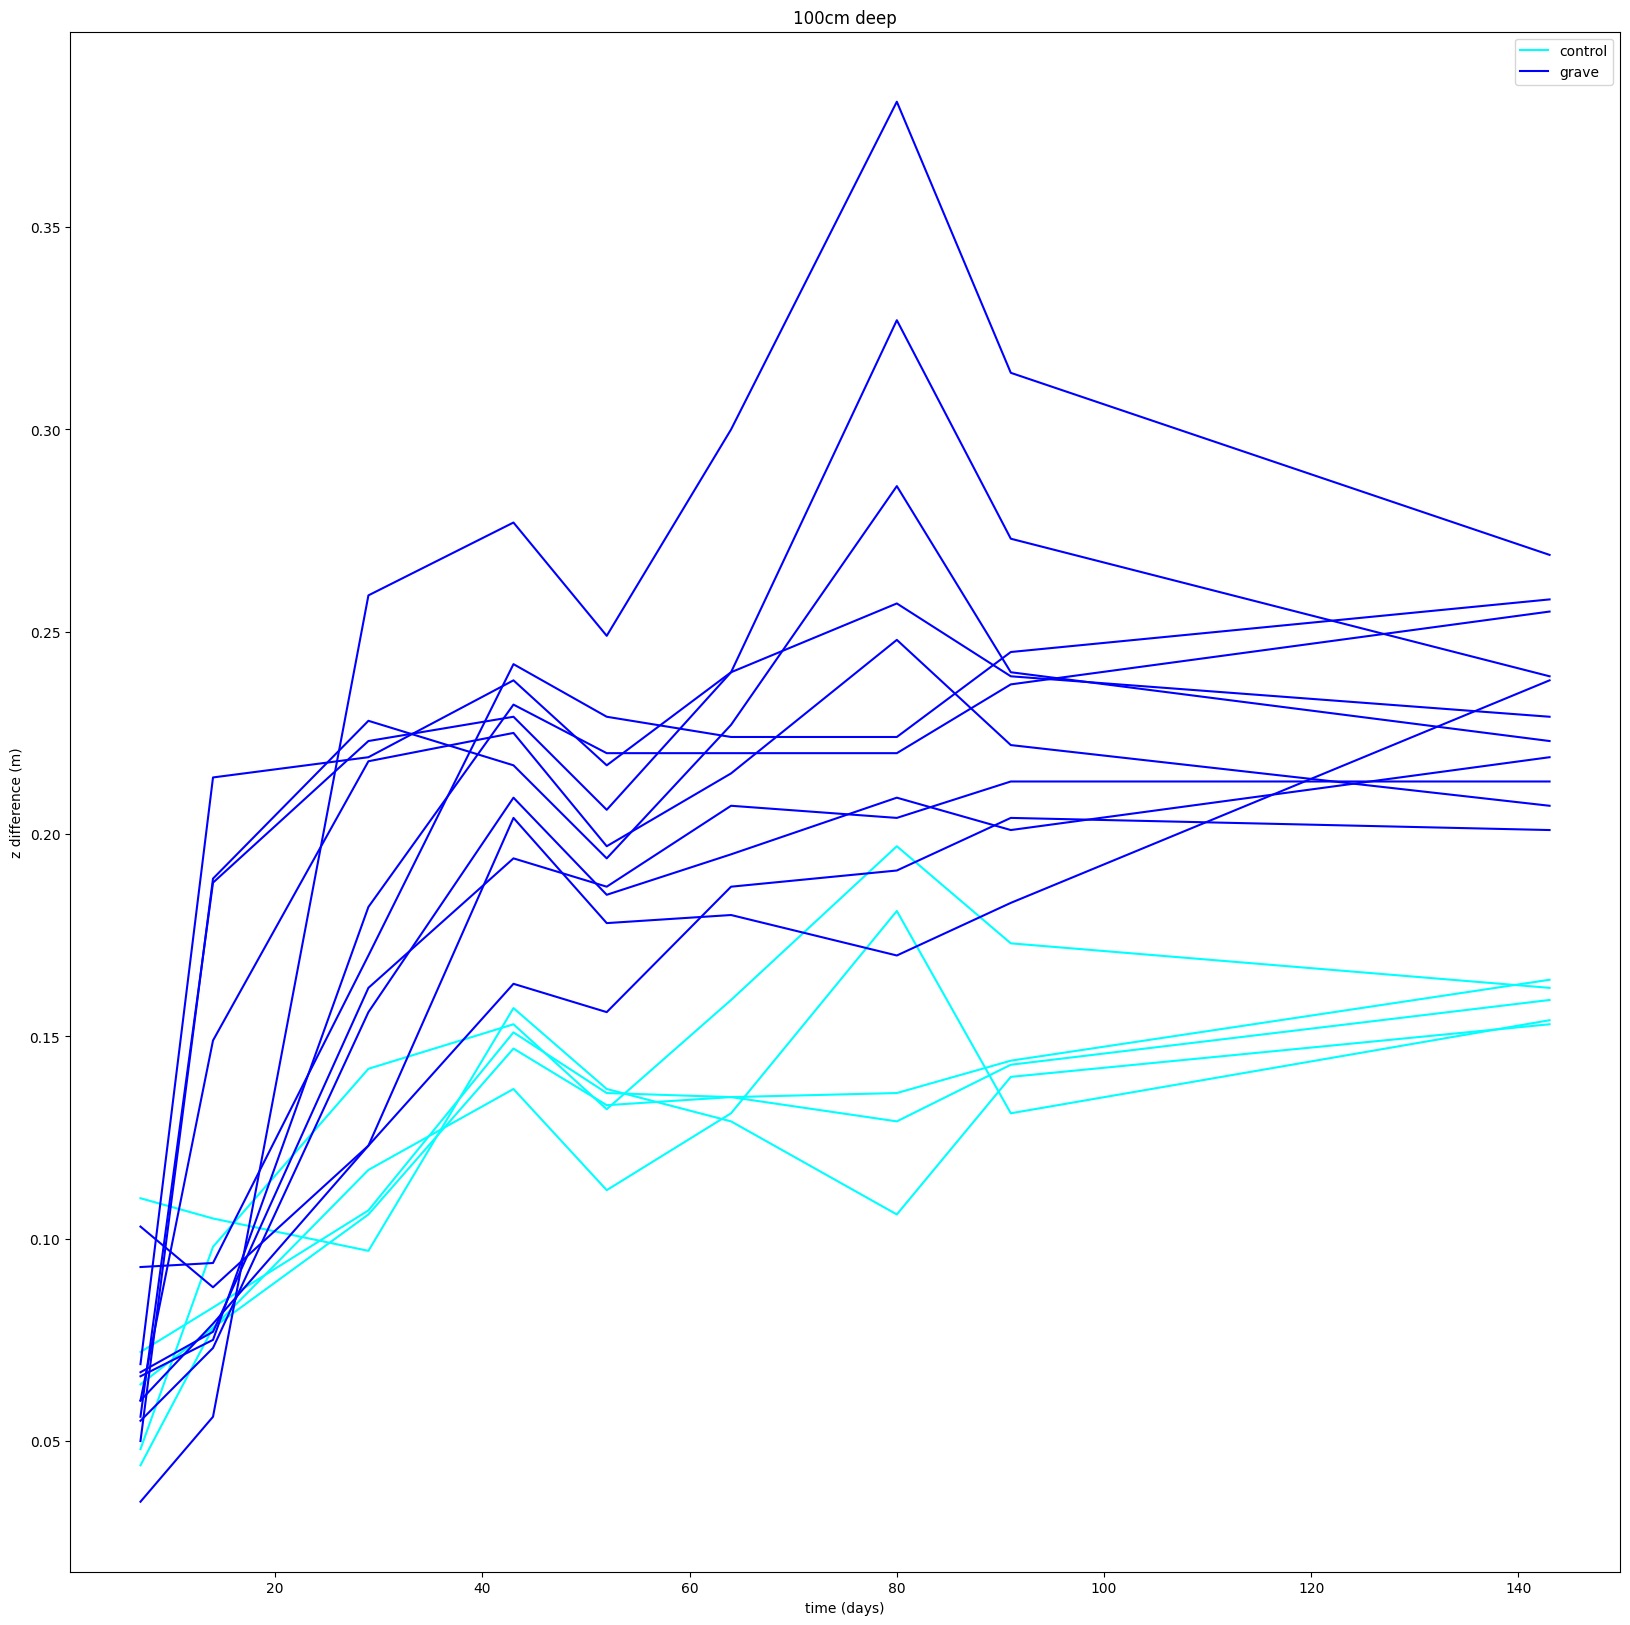

In [23]:
#plot showing all graves and controls with a depth of 100cm, split into two colour categories - graves and controls.
plt.figure(figsize = [20, 20])  
for (category, depth), stats in stats_per_grave_df.groupby(['category', 'depth']):
    #stats=stats_per_grave_df[stats_per_grave_df['category'] == category & stats_per_grave_df['depth'] == depth]
    if category == 'grave' and depth == 100:
        colour = 'b'
    elif category == 'control' and depth == 100:
        colour = 'cyan'
    elif category == 'grave' and depth == 60:
        colour = 'r'
    elif category == 'control' and depth == 60:
        colour = 'magenta'
    else:
        colour = 'k'
    label=f"{category}"
    is_first = True
    for (grave), grave_stats in stats.groupby('grave'):   
        if depth == 60:
            continue
        if depth == 200:
            continue       
        plt.plot(grave_stats['time'], grave_stats['maxx'], color= colour, label = label if is_first else None)
        is_first = False
plt.legend()
plt.xlabel('time (days)')
plt.ylabel('z difference (m)')
plt.title('100cm deep')


Text(0.5, 1.0, '100cm deep')

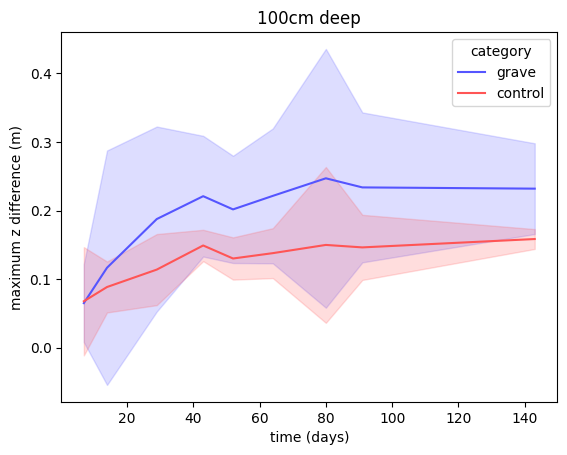

In [24]:
#plot of the averge of all max z difs of all graves over time, with a standard deviation of 3 shown
sns.lineplot(stats_per_grave_df[stats_per_grave_df['depth'] == 100], x='time', y='maxx', hue='category', palette = 'seismic', errorbar = ('sd',3))
plt.xlabel('time (days)')
plt.ylabel('maximum z difference (m)')
plt.title('100cm deep')

Text(0.5, 1.0, '60cm deep')

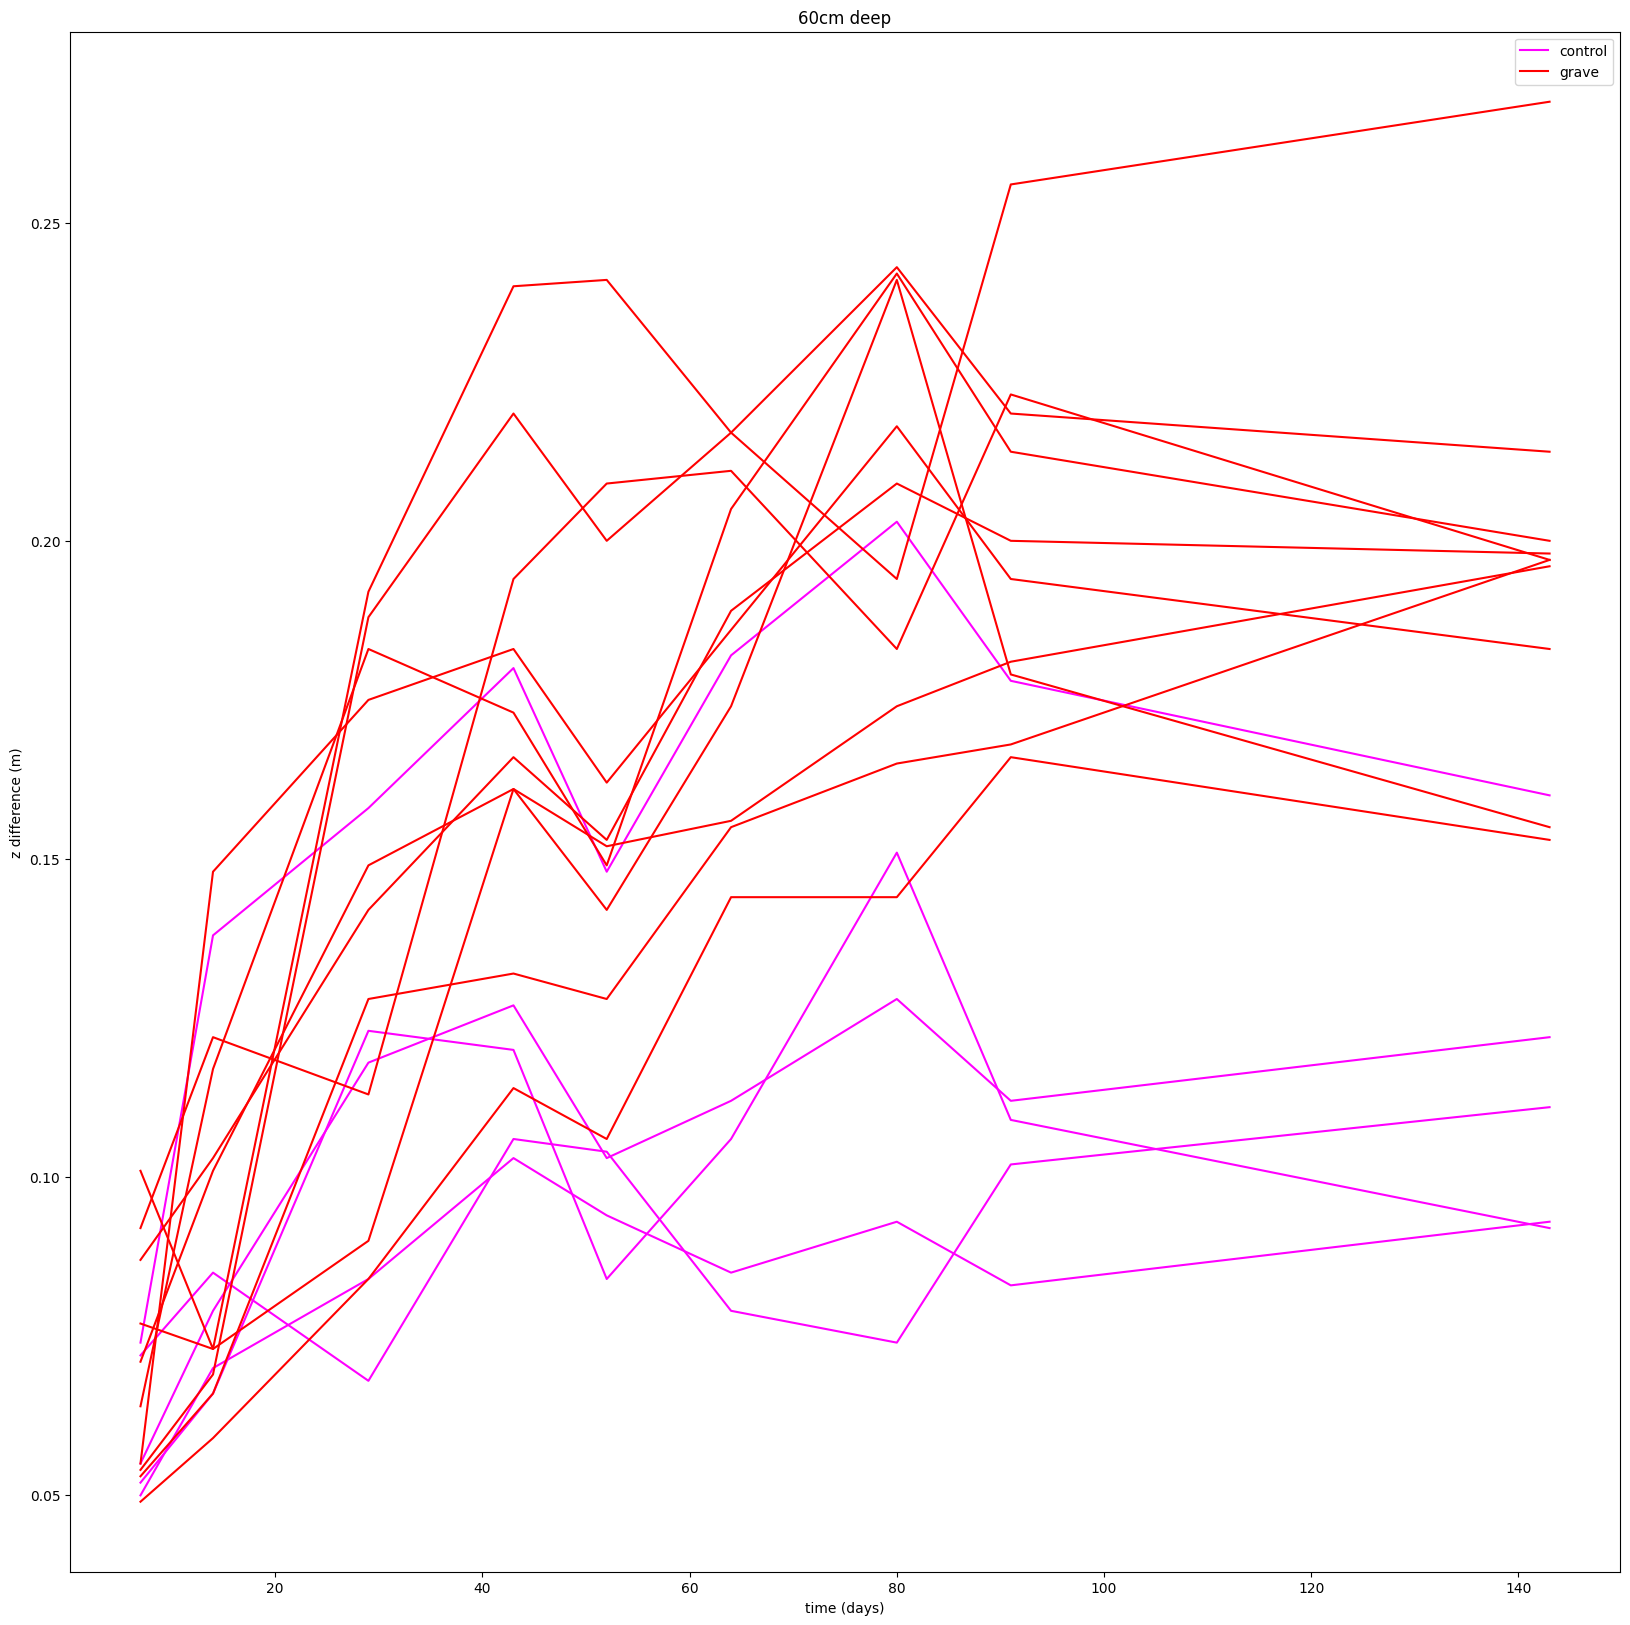

In [25]:
#plot showing all graves and controls with a depth of 60cm, split into two colour categories - graves and controls.
plt.figure(figsize = [20, 20])  
for (category, depth), stats in stats_per_grave_df.groupby(['category', 'depth']):
    #stats=stats_per_grave_df[stats_per_grave_df['category'] == category & stats_per_grave_df['depth'] == depth]
    if category == 'grave' and depth == 100:
        colour = 'b'
    elif category == 'control' and depth == 100:
        colour = 'cyan'
    elif category == 'grave' and depth == 60:
        colour = 'r'
    elif category == 'control' and depth == 60:
        colour = 'magenta'
    else:
        colour = 'k'
    label=f"{category}"
    is_first = True
    for (grave), grave_stats in stats.groupby('grave'):   
        if depth == 100:
            continue
        if depth == 200:
            continue       
        plt.plot(grave_stats['time'], grave_stats['maxx'], color= colour, label = label if is_first else None)
        is_first = False
plt.legend()
plt.xlabel('time (days)')
plt.ylabel('z difference (m)')
plt.title('60cm deep')

Text(0.5, 1.0, '60cm deep')

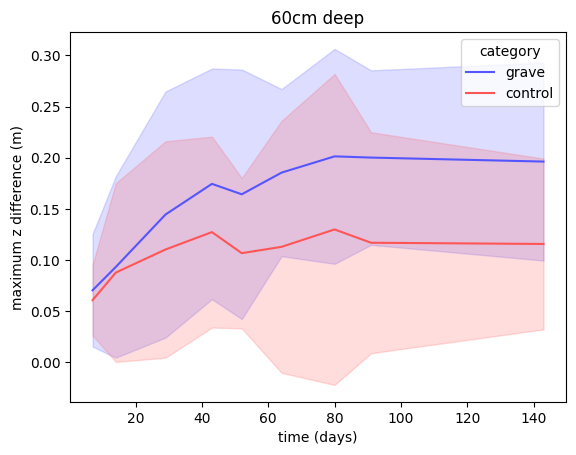

In [26]:
#plot of the averge of all max z difs of all graves over time, with a standard deviation of 3 shown
sns.lineplot(stats_per_grave_df[stats_per_grave_df['depth'] == 60], x='time', y='maxx', hue='category', palette = 'seismic', errorbar = ('sd',3))
plt.xlabel('time (days)')
plt.ylabel('maximum z difference (m)')
plt.title('60cm deep')

<Axes: xlabel='time', ylabel='mean'>

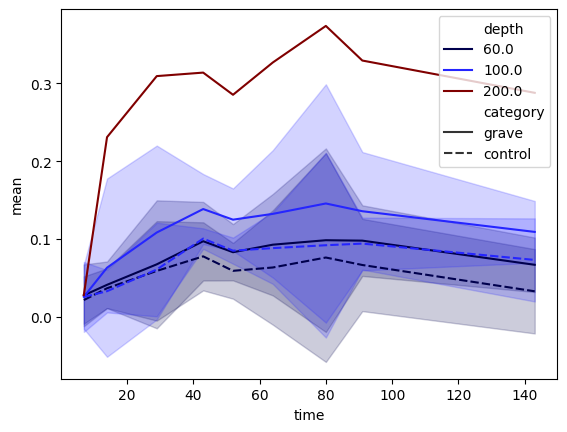

In [27]:
sns.lineplot(stats_per_grave_df, x='time', y='mean', hue='depth', style='category', palette = 'seismic', errorbar = ('sd',3))

Text(0.5, 1.0, '100cm deep')

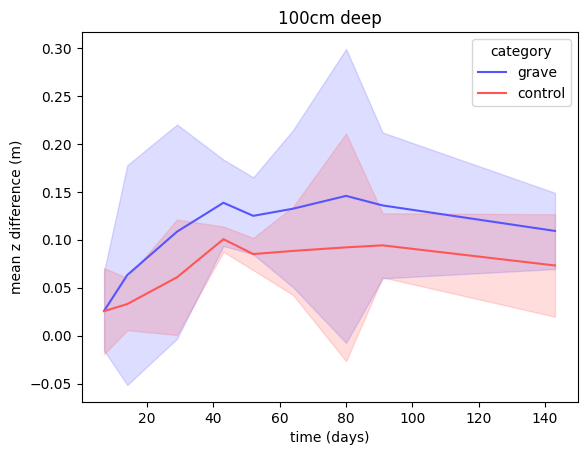

In [28]:
#plot of the averge of all mean z difs of all graves over time, with a standard deviation of 3 shown
sns.lineplot(stats_per_grave_df[stats_per_grave_df['depth'] == 100], x='time', y='mean', hue='category', palette = 'seismic', errorbar = ('sd',3))
plt.xlabel('time (days)')
plt.ylabel('mean z difference (m)')
plt.title('100cm deep')

Text(0.5, 1.0, '60cm deep')

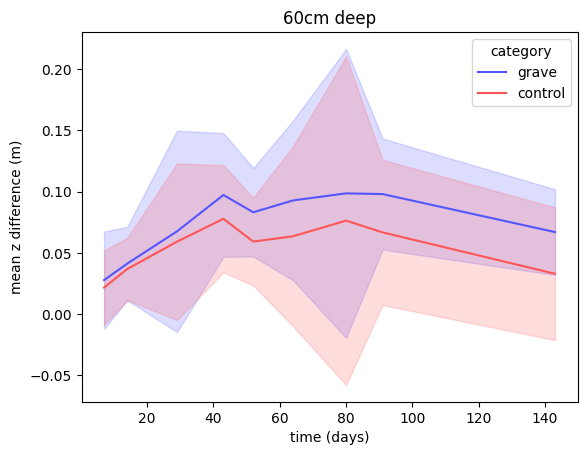

In [29]:
#plot of the averge of all mean z difs of all graves over time, with a standard deviation of 3 shown
sns.lineplot(stats_per_grave_df[stats_per_grave_df['depth'] == 60], x='time', y='mean', hue='category', palette = 'seismic', errorbar = ('sd', 3))
plt.xlabel('time (days)')
plt.ylabel('mean z difference (m)')
plt.title('60cm deep')

Text(0.5, 1.0, '100cm deep')

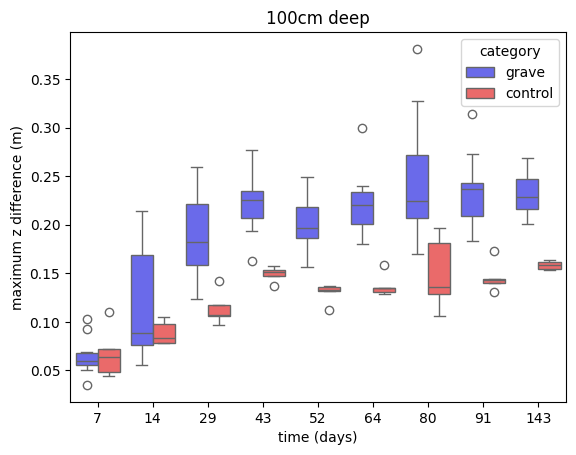

In [30]:
#plot of the averge of all max z difs of all graves over time, with a standard deviation of 3 shown
sns.boxplot(stats_per_grave_df[stats_per_grave_df['depth'] == 100], x='time', y='maxx', hue='category', palette = 'seismic')
plt.xlabel('time (days)')
plt.ylabel('maximum z difference (m)')
plt.title('100cm deep')

Text(0.5, 1.0, '60cm deep')

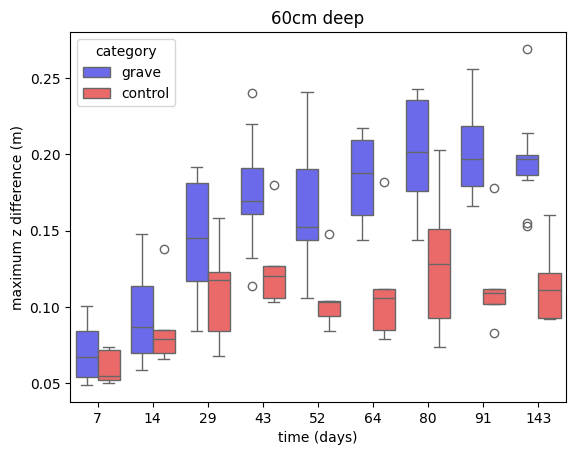

In [31]:
#plot of the averge of all max z difs of all graves over time, with a standard deviation of 3 shown
sns.boxplot(stats_per_grave_df[stats_per_grave_df['depth'] == 60], x='time', y='maxx', hue='category', palette = 'seismic')
plt.xlabel('time (days)')
plt.ylabel('maximum z difference (m)')
plt.title('60cm deep')